In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
cars_fuel =pd.read_csv("fuel-econ.csv")
cars_fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Preparatory Step
The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: `{Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}`. 



### **TO DO**: 
1. What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the `VClass` column, while the engine sizes are in the `displ` column (in liters). 

**Hint**: Make sure that the order of vehicle classes makes sense in your plot!

In [3]:
vehicle_classes = cars_fuel['VClass'].unique()
vehicle_classes

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [4]:
vehicle_order = [
    'Minicompact Cars', 
    'Subcompact Cars', 
    'Compact Cars', 
    'Midsize Cars', 
    'Large Cars'
]


avg_engine_size = cars_fuel.groupby('VClass')['displ'].mean().reindex(vehicle_order).reset_index()
avg_engine_size

,VClass,displ
0,Minicompact Cars,3.106854
1,Subcompact Cars,3.036701
2,Compact Cars,2.474599
3,Midsize Cars,2.892508
4,Large Cars,3.742400


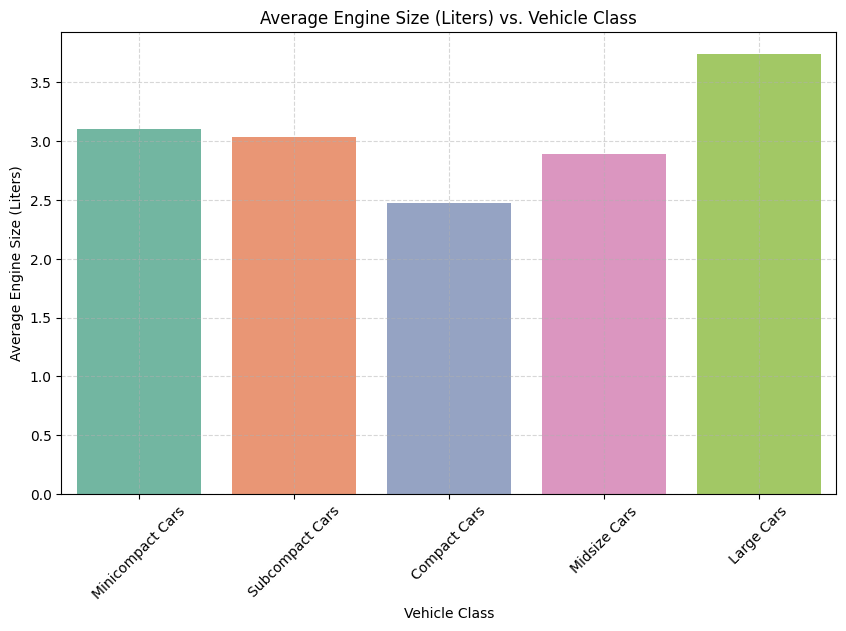

In [6]:
plt.figure(figsize=(10, 6))
sb.barplot(data=avg_engine_size, x='VClass', y='displ', hue='VClass', palette='Set2', dodge=False, legend=False)
plt.title('Average Engine Size (Liters) vs. Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Engine Size (Liters)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
